# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.
Выполнил студент гр. 0383 Емельянов Дмитрий. Вариант №53

## Цель работы
Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения и анализа сетей аффилированности.

## Основные теоретические положения
**Подгруппа** $-$ любое подмножество акторов и все связи между ними.

**Сети аффилированности** $-$ сети, в которой участники аффилированны друг с другом на основе сотрудничества в рамках группы или совместного участия в событии.

**n-клика** $-$ максимальный подграф, в котором наибольшее геодезическое расстояние между любыми двумя узлами $\leqslant n$: $d(i, j) \leqslant n, \forall n_i, n_j, n_j \in N_S$.

**n-клан** $-$ n-клика, в которой геодезическое расстояние $d(i, j)$ между всеми узлами в подграфе не превышает n для путей внутри подграфа.

**n-клуб** $-$ максимальный подграф диаметра $\leqslant n$.

**k-ядро** $-$ максимальный подграф, в котором каждая вершина связана как минимум с k другими вершинами этого же подграфа.

**k-плекс** $-$ максимальный подграф, содержащиё $g_s$ узлов, в котором каждый узел смежен не менее чем с $(g_s - k)$ узлами подграфа: $d_s(i) \geqslant g_s - k, \forall n_i \in N_s$, где $d_s(i) - $ степень узла $n_i$ в подграфе $G$.

**LS-множество** - $это множество узлов подграфа N_S подграфа G_S, $ такое что любое собственное подмножество $L \in N_s$ имеет больше линий к узлам
$N_s$ \ $L$, чем к $N$ \ $N_s$  

**$\lambda-множество$** - множество узлов в $N_s$, такое что любая пара узлов в нём имеет большее линейное соединение, 
чем любая пара узлов, состоящая из одного узла из $\lambda-множества$ и одного извне.

**Биграф** (**двудольный граф**) $-$ граф, узлы которого можно разделить на 2 подмножества, а все рёбра соединяют узлы, принадлежащие разным подмножествам.

**Гиперграф** $-$ обобщение понятия графа; гиперграф состоит из множества объектов и множества подмножеств объектов, в котором каждый объект принадлежит хотя бы одному подмножеству, причём ни одно подмножество не является пустым: $H=H(A, B)$.

**Двойственный гиперграф** для гиперграфа $H=H(A, B)$: $H^* = H(B, A)$.

**Матрица соучастия акторов** $X^N = \{x_{ij}^N\}$: $\displaystyle{x_{ij}^N=\sum^h_{k=1} a_{ik}a_{jk}, X^N = XX^T}$.

**Матрица перекрытия событий** $X^M = \{x_{kl}^M\}$: $\displaystyle{x_{kl}^M=\sum^g_{k=1} a_{ik}a_{il}, X^M = X^TX}$.

**Степень участия** $-$ количество событий, с которым связан каждый актор: $\displaystyle{a_{i+}=\sum^h_{j=1} a_{ij} = x_{ii}^N}$.

**Среднее количество событий**, с которыми акторы аффилированны: $\displaystyle{\overline{a}_{i+} = \frac{1}{g}\sum^g_{i=1}\sum^h_{j=1}a_{ij}=\frac{a_{++}}{g}}=\frac{1}{g}\sum^g_{i=1}x_{ii}^N$.

**Размер событий**: $\displaystyle{a_{+j} = \sum^g_{i=1} a_{ij} = x_{jj}^M}$.

**Средний размер событий** $-$ среднее количество акторов в каждом событии или средняя степень узлов, представляющих события в двудольном графе: $\displaystyle{\overline{a}_{+j} = \frac{1}{h}\sum^h_{j=1}x_{jj}^M}$.

**Плотность для отношения соучастия** $\Delta_{(N)} = \displaystyle{\frac{1}{g(g-1)}\sum^g_{i=1}\sum^g_{j=1}x_{ij}^N}$.

**Плотность для отношения перекрытия** $\Delta_{(M)} = \displaystyle{\frac{1}{h(h-1)}\sum^h_{k=1}\sum^h_{l=1, l\neq k}x_{kl}^M}$.

**Диаметр аффилированной сети** $-$ длина самого длинного пути между любой парой акторов/событий.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


## 0) Загрузка библиотек

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("RBGL")

In [ ]:
install.packages("HyperG")

In [ ]:
library(igraph);
library(statnet);
library(HyperG);

## 1) Получение данных и построение графа
Из файла florentine_business.csv (для нечётных вариантов) и файла florentine_marital.csv (для чётных вариантов) извлечь социоматрицу с помощью соответствующих функций. Отобразить сеть с помощью одного из алгоритмов укладки.

In [2]:
# df <- read.csv('F:/Документы/Матпакеты/florentine_business.csv', comment.char = '#')
df <- read.csv('florentine_business.csv', comment.char = '#')
rownames(df) <- colnames(df) 
sociomatrix <- as.matrix(df)

socialnet <- as.network(sociomatrix) 
socialnet.graph <- graph_from_adjacency_matrix(sociomatrix, mode="undirected")

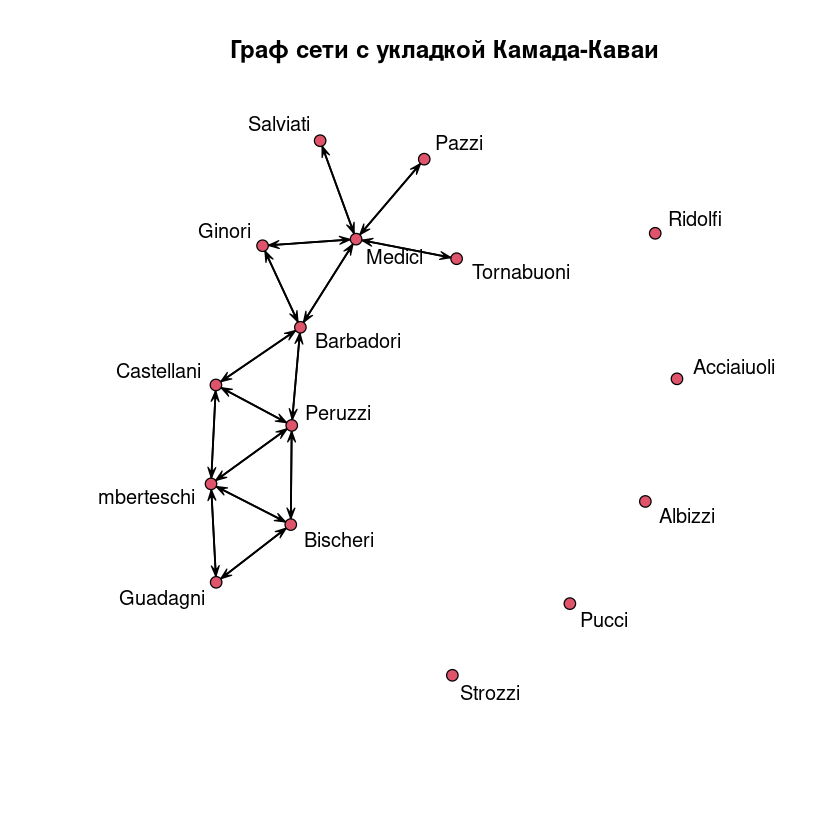

In [3]:
plot(socialnet, displaylabels=T, mode = "kamadakawai", main="Граф сети с укладкой Камада-Каваи")

Вывод: Рассматривается сеть деловых взаимоотношений между флорентийскими семьями. Есть 5 обособлненных родов, с которыми дела не ведутся,
и есть род Medici - который является наиболее влиятельным.

# 2) Нахождение подгрупп
Исследовать данную сеть на предмет подгрупп с помощью:
* n-клик;
* n-кланов;
* n-клубов;
* k-ядер;
* k-плексов.  

Указать какие группы получились. Сделать выводы.

In [ ]:
g <- igraph.to.graphNEL(as.undirected(socialnet.graph))

## n-клики:

In [ ]:
ncliques <- kCliques(g)
ncliques

Данный пункт выполнялся в RStudio, так как с установкой RBGL возникали проблемы - удалось поставить его только в RStudio.

In [ ]:
# вывод верхней команды:

$`1-cliques`
$`1-cliques`[[1]]
[1] "Barbadori"  "Castellani" "Peruzzi"   

$`1-cliques`[[2]]
[1] "Barbadori" "Ginori"    "Medici"   

$`1-cliques`[[3]]
[1] "Bischeri"     "Guadagni"     "Lamberteschi"

$`1-cliques`[[4]]
[1] "Bischeri"     "Lamberteschi" "Peruzzi"     

$`1-cliques`[[5]]
[1] "Castellani"   "Lamberteschi" "Peruzzi"     

$`1-cliques`[[6]]
[1] "Medici" "Pazzi" 

$`1-cliques`[[7]]
[1] "Medici"   "Salviati"

$`1-cliques`[[8]]
[1] "Medici"     "Tornabuoni"

$`2-cliques`
$`2-cliques`[[1]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Lamberteschi" "Peruzzi"     

$`2-cliques`[[2]]
[1] "Barbadori"  "Castellani" "Ginori"     "Medici"     "Peruzzi"   

$`2-cliques`[[3]]
[1] "Bischeri"     "Castellani"   "Guadagni"     "Lamberteschi" "Peruzzi"     

$`2-cliques`[[4]]
[1] "Barbadori"  "Ginori"     "Medici"     "Pazzi"      "Salviati"   "Tornabuoni"


$`3-cliques`
$`3-cliques`[[1]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Lamberteschi" "Medici"       "Peruzzi"     

$`3-cliques`[[2]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Guadagni"     "Lamberteschi" "Peruzzi"     

$`3-cliques`[[3]]
[1] "Barbadori"  "Castellani" "Ginori"     "Medici"     "Pazzi"      "Peruzzi"    "Salviati"   "Tornabuoni"


$`4-cliques`
$`4-cliques`[[1]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Peruzzi"     

$`4-cliques`[[2]]
 [1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Lamberteschi" "Medici"       "Pazzi"        "Peruzzi"      "Salviati"    
[10] "Tornabuoni"  


$`5-cliques`
$`5-cliques`[[1]]
 [1] "Barbadori"    "Bischeri"     "Castellani"   "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"        "Peruzzi"     
[10] "Salviati"     "Tornabuoni"  

Вывод: так как диаметр графа равен 5, то понятно, что n-клики с $n>5$ будут включать в себя всех акторов сети. Это хорошо заметно уже на 5-клике — в ней как раз находятся все 11 акторов. Также, в ести есть много 1-клик, 2-клик и 3-клик, это сходится со структурой сети, представленной на графе в пункте 1.

## n-кланы:

In [ ]:
is_clan <-function(graph, clique, name){
  subgraph <- subgraph(graph,clique)
  order <- unlist(strsplit(name,"-"))[1]
  diameter <- diameter(subgraph,directed = FALSE)
  if(diameter > order){
    return(FALSE)
  }
  return (TRUE)
}

graph <- socialnet.graph
cliques <- kCliques(g)
mask <- 1:length(cliques)
mask <-sapply(mask, function(x) is_clan(graph, cliques[[x]],names(cliques)[x]))
names(cliques)<-sapply(names(cliques), function(x) paste(unlist(strsplit(x,"-"))[1],"-clan",sep = ""))
cliques[mask]

In [ ]:
Вывод програмы:

$`1-clan`

        'Lamberteschi'
        'Castellani'
        'Peruzzi'

$`1-clan`

        'Lamberteschi'
        'Bischeri'
        'Guadagni'

$`1-clan`

        'Lamberteschi'
        'Bischeri'
        'Peruzzi'

$`1-clan`

        'Peruzzi'
        'Barbadori'
        'Castellani'

$`1-clan`

        'Ginori'
        'Barbadori'
        'Medici'

$`2-clan`

        'Castellani'
        'Peruzzi'
        'Barbadori'
        'Bischeri'
        'Lamberteschi'

$`2-clan`

        'Castellani'
        'Peruzzi'
        'Barbadori'
        'Medici'
        'Ginori'

$`2-clan`

        'Castellani'
        'Peruzzi'
        'Guadagni'
        'Lamberteschi'
        'Bischeri'

$`2-clan`

        'Tornabuoni'
        'Barbadori'
        'Salviati'
        'Pazzi'
        'Medici'
        'Ginori'

$`3-clan`

        'Guadagni'
        'Barbadori'
        'Peruzzi'
        'Lamberteschi'
        'Castellani'
        'Bischeri'

$`3-clan`

        'Bischeri'
        'Barbadori'
        'Peruzzi'
        'Medici'
        'Lamberteschi'
        'Ginori'
        'Castellani'

$`3-clan`

        'Tornabuoni'
        'Barbadori'
        'Salviati'
        'Peruzzi'
        'Pazzi'
        'Medici'
        'Ginori'
        'Castellani'

$`4-clan`

        'Guadagni'
        'Barbadori'
        'Peruzzi'
        'Medici'
        'Lamberteschi'
        'Ginori'
        'Castellani'
        'Bischeri'

$`4-clan`

        'Medici'
        'Barbadori'
        'Tornabuoni'
        'Salviati'
        'Peruzzi'
        'Pazzi'
        'Lamberteschi'
        'Ginori'
        'Castellani'
        'Bischeri'

$`5-clan`

        'Guadagni'
        'Barbadori'
        'Tornabuoni'
        'Salviati'
        'Peruzzi'
        'Pazzi'
        'Medici'
        'Lamberteschi'
        'Ginori'
        'Castellani'
        'Bischeri'



Вывод: так как n-клан является n-кликой с дополнительным ограничением (пути только внутри подграфа n-клики), то логично, что n-кланов должно быть не больше, чем n-клик. Так и есть: 1-кланов в сети 5 штук, а 1-клик — 8. Стоит отметить, что 5-клика оказалась 5-кланом, что логично, так как она включает в себя всех акторов сети — значит, рассматриваются все ребра исходной сети, а значит эта 5-клика не может не быть 5-кланом.

## k-ядра:

In [ ]:
ncores <- kCores(g)
ncores

In [ ]:
Вывод программы:

Acciaiuoli      Albizzi    Barbadori     Bischeri   Castellani       Ginori     Guadagni Lamberteschi       Medici        Pazzi      Peruzzi 
           0            0            2            2            2            2            2            2            2            1            2 
       Pucci      Ridolfi     Salviati      Strozzi   Tornabuoni 
           0            0            1            0            1 

Пояснение: число под названием рода означает, в ядро какой степени входит этот актор. Например, в 2-ядро входят Barbadori, Bisheri и другие. Если актор входит в k-ядро, то он входит и в (k-1)-ядро, поэтому данная интерпретация вполне обоснована.

Вывод: в 1-ядро входят вершины с степенью 1, а в 2-ядро - со степенью не меньше 2. Это соотносится с определением k-ядра. Изолированные вершины не входят в k-ядра.

## k-плексы:

In [ ]:
kplexes <- function(g) {
    result <- c()
    for (i in 2:(length(V(g)))) {
        for (j in 1:(i-1)) {
            plex <- kplex(g, j, i)
            if(length(plex) > 0) {
                result[[paste(toString(i), toString(j), "plex", sep="_")]] <- plex
            }
        }
    }
    return(result)
}

kplex <- function(g,k,m){
    g.sym <- as.undirected(g)
    k.plex <- list()
    g.sym.degmk <- induced_subgraph(g.sym,igraph::degree(g.sym)>=(m-k))
    if(length(V(g.sym.degmk)) < m) {
        return(k.plex)
    } 
    k.cand <- combn(V(g.sym.degmk)$name,m)
    k.plex <- list() 
    k.plex.i <- 1 
    for (k.cand.i in 1:dim(k.cand)[2]){ 
        g.k.cand <- induced_subgraph(g.sym.degmk,k.cand[,k.cand.i]) 
        if (min(igraph::degree(g.k.cand))>=(m-k)){
            k.plex[[k.plex.i]] <- k.cand[,k.cand.i] 
            k.plex.i <- k.plex.i+1 
        }
    }
    return(k.plex)
}

kplexes(g)

$`2_1_plex`
$`2_1_plex`[[1]]
[1] "Barbadori"  "Castellani"

$`2_1_plex`[[2]]
[1] "Barbadori" "Ginori"   

$`2_1_plex`[[3]]
[1] "Barbadori" "Medici"   

$`2_1_plex`[[4]]
[1] "Barbadori" "Peruzzi"  

$`2_1_plex`[[5]]
[1] "Bischeri" "Guadagni"

$`2_1_plex`[[6]]
[1] "Bischeri"     "Lamberteschi"

$`2_1_plex`[[7]]
[1] "Bischeri" "Peruzzi" 

$`2_1_plex`[[8]]
[1] "Castellani"   "Lamberteschi"

$`2_1_plex`[[9]]
[1] "Castellani" "Peruzzi"   

$`2_1_plex`[[10]]
[1] "Ginori" "Medici"

$`2_1_plex`[[11]]
[1] "Guadagni"     "Lamberteschi"

$`2_1_plex`[[12]]
[1] "Lamberteschi" "Peruzzi"     

$`2_1_plex`[[13]]
[1] "Medici" "Pazzi" 

$`2_1_plex`[[14]]
[1] "Medici"   "Salviati"

$`2_1_plex`[[15]]
[1] "Medici"     "Tornabuoni"


$`3_1_plex`
$`3_1_plex`[[1]]
[1] "Barbadori"  "Castellani" "Peruzzi"   

$`3_1_plex`[[2]]
[1] "Barbadori" "Ginori"    "Medici"   

$`3_1_plex`[[3]]
[1] "Bischeri"     "Guadagni"     "Lamberteschi"

$`3_1_plex`[[4]]
[1] "Bischeri"     "Lamberteschi" "Peruzzi"     

$`3_1_plex`[[5]]
[1] "Castellani"   "Lamberteschi" "Peruzzi"     


$`3_2_plex`
$`3_2_plex`[[1]]
[1] "Barbadori" "Bischeri"  "Peruzzi"  

$`3_2_plex`[[2]]
[1] "Barbadori"  "Castellani" "Ginori"    

$`3_2_plex`[[3]]
[1] "Barbadori"    "Castellani"   "Lamberteschi"

$`3_2_plex`[[4]]
[1] "Barbadori"  "Castellani" "Medici"    

$`3_2_plex`[[5]]
[1] "Barbadori"  "Castellani" "Peruzzi"   

$`3_2_plex`[[6]]
[1] "Barbadori" "Ginori"    "Medici"   

$`3_2_plex`[[7]]
[1] "Barbadori" "Ginori"    "Peruzzi"  

$`3_2_plex`[[8]]
[1] "Barbadori"    "Lamberteschi" "Peruzzi"     

$`3_2_plex`[[9]]
[1] "Barbadori" "Medici"    "Pazzi"    

$`3_2_plex`[[10]]
[1] "Barbadori" "Medici"    "Peruzzi"  

$`3_2_plex`[[11]]
[1] "Barbadori" "Medici"    "Salviati" 

$`3_2_plex`[[12]]
[1] "Barbadori"  "Medici"     "Tornabuoni"

$`3_2_plex`[[13]]
[1] "Bischeri"     "Castellani"   "Lamberteschi"

$`3_2_plex`[[14]]
[1] "Bischeri"   "Castellani" "Peruzzi"   

$`3_2_plex`[[15]]
[1] "Bischeri"     "Guadagni"     "Lamberteschi"

$`3_2_plex`[[16]]
[1] "Bischeri" "Guadagni" "Peruzzi" 

$`3_2_plex`[[17]]
[1] "Bischeri"     "Lamberteschi" "Peruzzi"     

$`3_2_plex`[[18]]
[1] "Castellani"   "Guadagni"     "Lamberteschi"

$`3_2_plex`[[19]]
[1] "Castellani"   "Lamberteschi" "Peruzzi"     

$`3_2_plex`[[20]]
[1] "Ginori" "Medici" "Pazzi" 

$`3_2_plex`[[21]]
[1] "Ginori"   "Medici"   "Salviati"

$`3_2_plex`[[22]]
[1] "Ginori"     "Medici"     "Tornabuoni"

$`3_2_plex`[[23]]
[1] "Guadagni"     "Lamberteschi" "Peruzzi"     

$`3_2_plex`[[24]]
[1] "Medici"   "Pazzi"    "Salviati"

$`3_2_plex`[[25]]
[1] "Medici"     "Pazzi"      "Tornabuoni"

$`3_2_plex`[[26]]
[1] "Medici"     "Salviati"   "Tornabuoni"


$`4_2_plex`
$`4_2_plex`[[1]]
[1] "Barbadori"    "Castellani"   "Lamberteschi" "Peruzzi"     

$`4_2_plex`[[2]]
[1] "Bischeri"     "Castellani"   "Lamberteschi" "Peruzzi"     

$`4_2_plex`[[3]]
[1] "Bischeri"     "Guadagni"     "Lamberteschi" "Peruzzi"     


$`4_3_plex`
$`4_3_plex`[[1]]
[1] "Barbadori"  "Bischeri"   "Castellani" "Guadagni"  

$`4_3_plex`[[2]]
[1] "Barbadori"    "Bischeri"     "Castellani"   "Lamberteschi"

$`4_3_plex`[[3]]
[1] "Barbadori"  "Bischeri"   "Castellani" "Peruzzi"   

$`4_3_plex`[[4]]
[1] "Barbadori" "Bischeri"  "Ginori"    "Guadagni" 

$`4_3_plex`[[5]]
[1] "Barbadori"    "Bischeri"     "Ginori"       "Lamberteschi"

$`4_3_plex`[[6]]
[1] "Barbadori" "Bischeri"  "Ginori"    "Peruzzi"  

$`4_3_plex`[[7]]
[1] "Barbadori" "Bischeri"  "Guadagni"  "Medici"   

$`4_3_plex`[[8]]
[1] "Barbadori" "Bischeri"  "Guadagni"  "Peruzzi"  

$`4_3_plex`[[9]]
[1] "Barbadori"    "Bischeri"     "Lamberteschi" "Medici"      

$`4_3_plex`[[10]]
[1] "Barbadori"    "Bischeri"     "Lamberteschi" "Peruzzi"     

$`4_3_plex`[[11]]
[1] "Barbadori" "Bischeri"  "Medici"    "Peruzzi"  

$`4_3_plex`[[12]]
[1] "Barbadori"    "Castellani"   "Ginori"       "Lamberteschi"

$`4_3_plex`[[13]]
[1] "Barbadori"  "Castellani" "Ginori"     "Medici"    

$`4_3_plex`[[14]]
[1] "Barbadori"  "Castellani" "Ginori"     "Peruzzi"   

Пояснение: при исполнении получился очень большой вывод. 

Вывод: в данной сети очень большое количество k-плексов. Первое число означает количество акторов $g_s$, второе число - k. Такое большое количество k-плексов для различного количества акторов получилось из-за того, что условие на образование подгруппы $d_s(i) \ge g_s-k$. Когда $g_s$ больше $k$ на 1 или 2 получается очень много подгрупп, так как условие выполняется достаточно просто — актор должен иметь степень 1 или 2.

## 3) Алгоритмы обнаружения сообществ 
C помощью библиотеки igraph исследовать алгоритмы обнаружения сообществ в зависимости от номера варианта:
* (3) InfoMAP, Louvain, Optimal.

InfoMAP — находит сообщество,которое минимизирует ожидаемую длину описания траектории случайного блуждающего объекта.

IGRAPH clustering infomap, groups: 7, mod: 0.36
+ groups:
  $`1`
  [1] "Acciaiuoli"
  
  $`2`
  [1] "Albizzi"
  
  $`3`
  [1] "Barbadori"  "Ginori"     "Medici"     "Pazzi"      "Salviati"  
  [6] "Tornabuoni"
  
  + ... omitted several groups/vertices

[1] 0.3644444

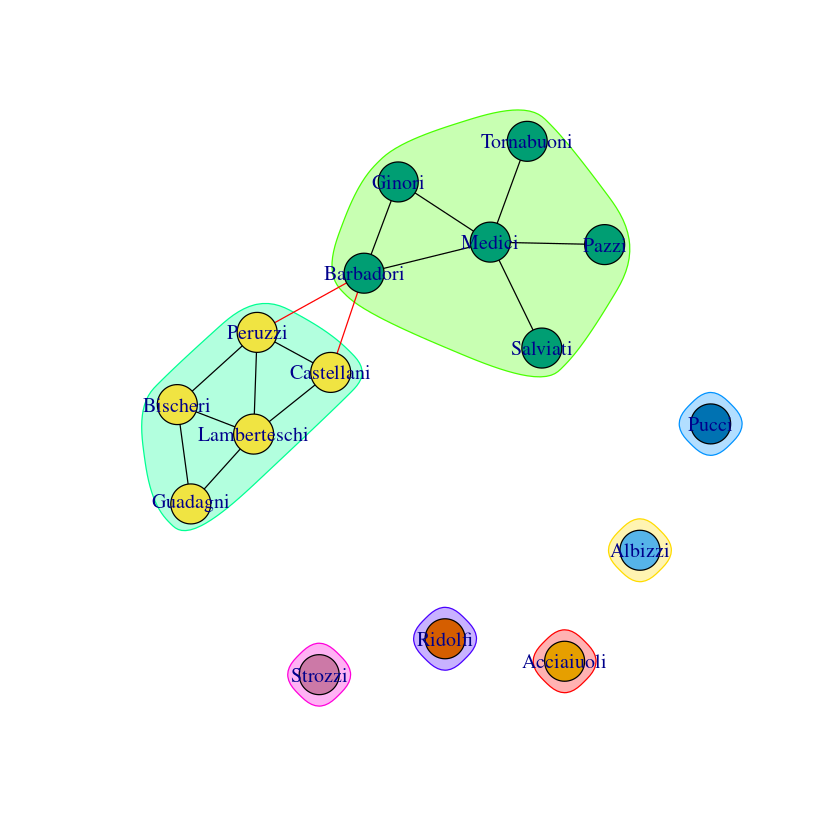

In [3]:
subgroups <- cluster_infomap(socialnet.graph)
subgroups
modularity(subgroups)
plot(subgroups, socialnet.graph)

Louvain — жадный метод оптимизации со временем работы $O(n \cdot logn)$. Краткое описание: сначала обнаруживаются небольшие сообщества путем локальной оптимизации модульности на всех узлах, а после каждое небольшое сообщество группируется в один узел, и первый шаг повторяется.

IGRAPH clustering multi level, groups: 8, mod: 0.33
+ groups:
  $`1`
  [1] "Acciaiuoli"
  
  $`2`
  [1] "Albizzi"
  
  $`3`
  [1] "Barbadori"  "Castellani" "Peruzzi"   
  
  $`4`
  + ... omitted several groups/vertices

[1] 0.3311111

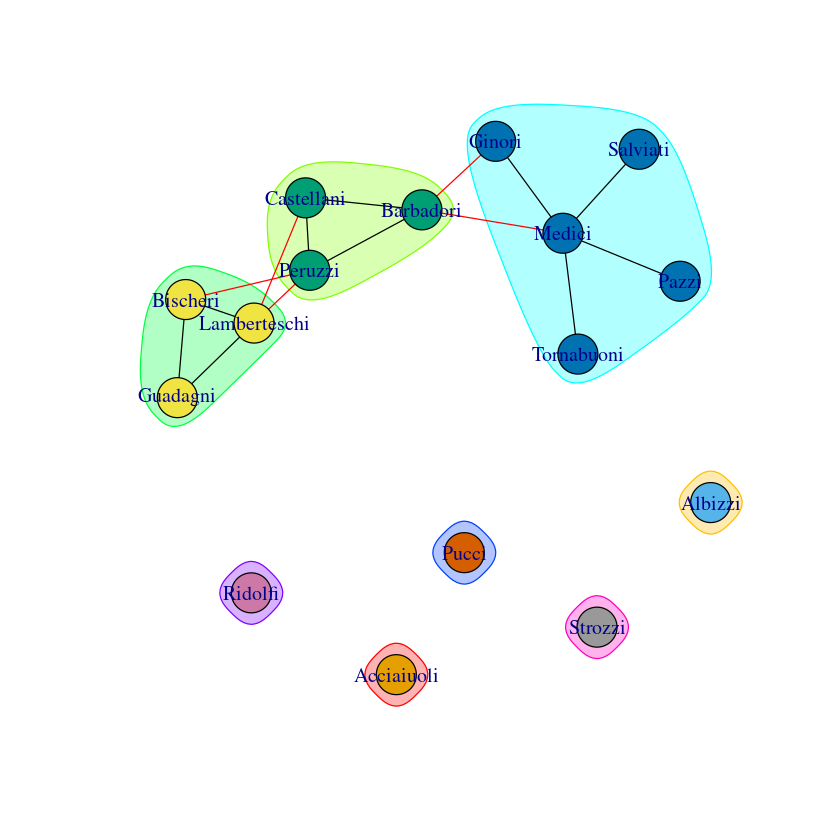

In [4]:
subgroups <- cluster_louvain(socialnet.graph)
subgroups
modularity(subgroups)
plot(subgroups, socialnet.graph)

Optimal - этот алгоритм находит сообщества с помощью максимизации модульности с эксопненциальной сложностью по времени. Расчет выполняется путем преобразования максимизации модульности в задачу целочисленного программирования и последующего вызова библиотеки GLPK для ее решения. 

IGRAPH clustering optimal, groups: 7, mod: 0.36
+ groups:
  $`1`
  [1] "Acciaiuoli"
  
  $`2`
  [1] "Albizzi"
  
  $`3`
  [1] "Barbadori"  "Ginori"     "Medici"     "Pazzi"      "Salviati"  
  [6] "Tornabuoni"
  
  + ... omitted several groups/vertices

[1] 0.3644444

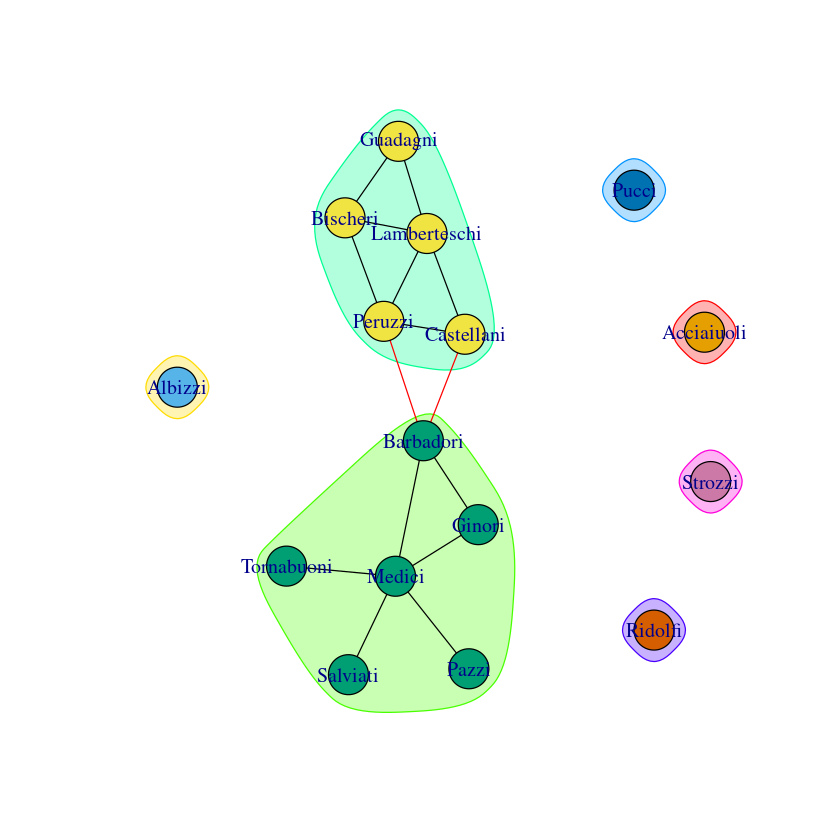

In [5]:
subgroups <- cluster_optimal(socialnet.graph)
subgroups
modularity(subgroups)
plot(subgroups, socialnet.graph)

Вывод: как можно заметить, все алгоритмы показали примерно одинаковую модулярность.

## 4) Файл ceo.csv
---
Из файла ceo.csv извлечь матрицу инцидентности с помощью соответствующих функций. Отобразить полученную матрицу

In [42]:
# df <- read.csv('F:/Документы/Матпакеты/ceo.csv', header = F, skip = 9)
df <- read.csv('ceo.csv',  header = F, skip = 9)
colnames(df) <- letters[1:15]
rownames(df) <- c(1:26)
inc_matrix <- as.matrix(df)
inc_matrix

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
6,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
8,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
9,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
10,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [43]:
socialnet.graph <- graph_from_incidence_matrix(inc_matrix)

## 5) Отобразить сеть в виде биграфа

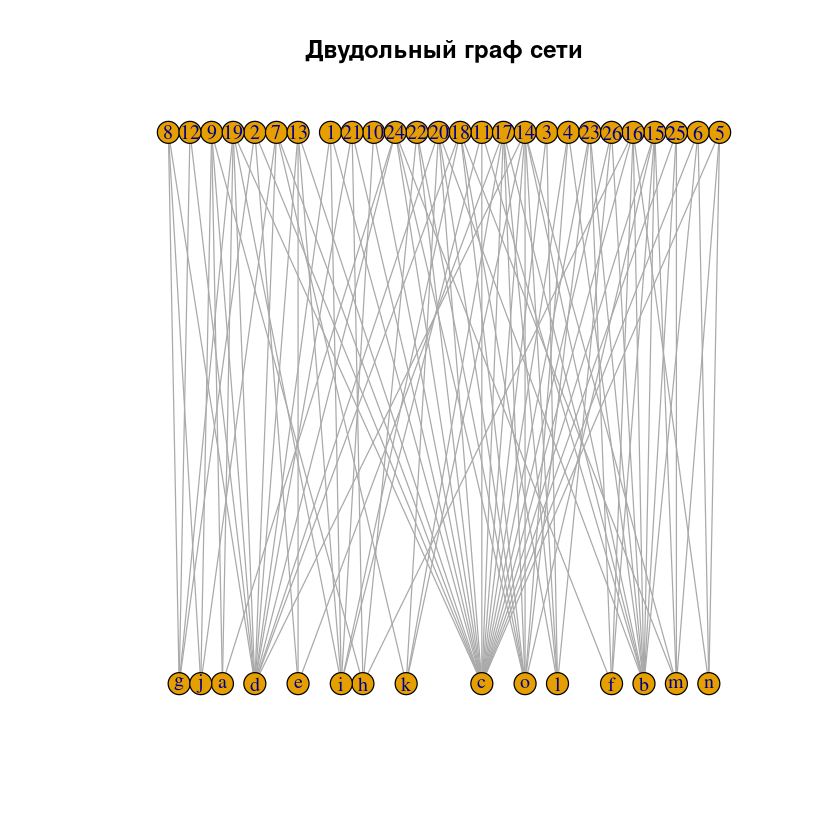

In [56]:

plot(socialnet.graph, layout = layout_as_bipartite, main="Двудольный граф сети",
     vertex.size = 8)
     

Для удобства отображения имена акторов и событий были представлены буквами и числами соответственно

## 6) Отобразить сеть в виде гиперграфа и двойственного гиперграфа (по желанию).

Построим гиперграф сети 

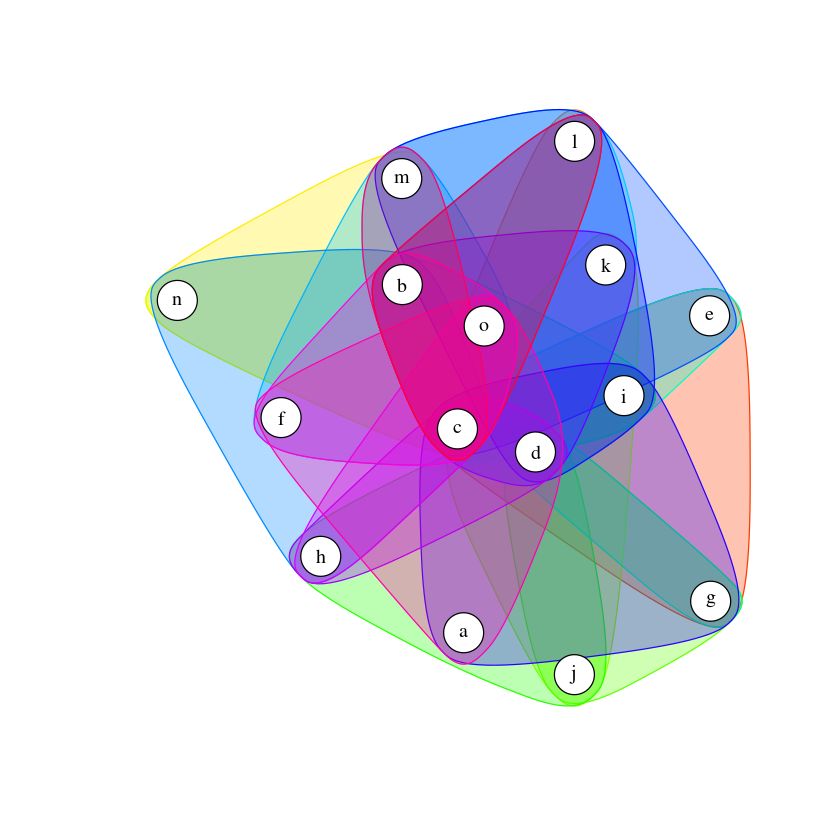

In [22]:
h2 <- hypergraph_from_incidence_matrix(inc_matrix)
plot(h2,
     vertex.color = "white",
     vertex.label.color = "black")
     

Построим двойственный гиперграф сети 

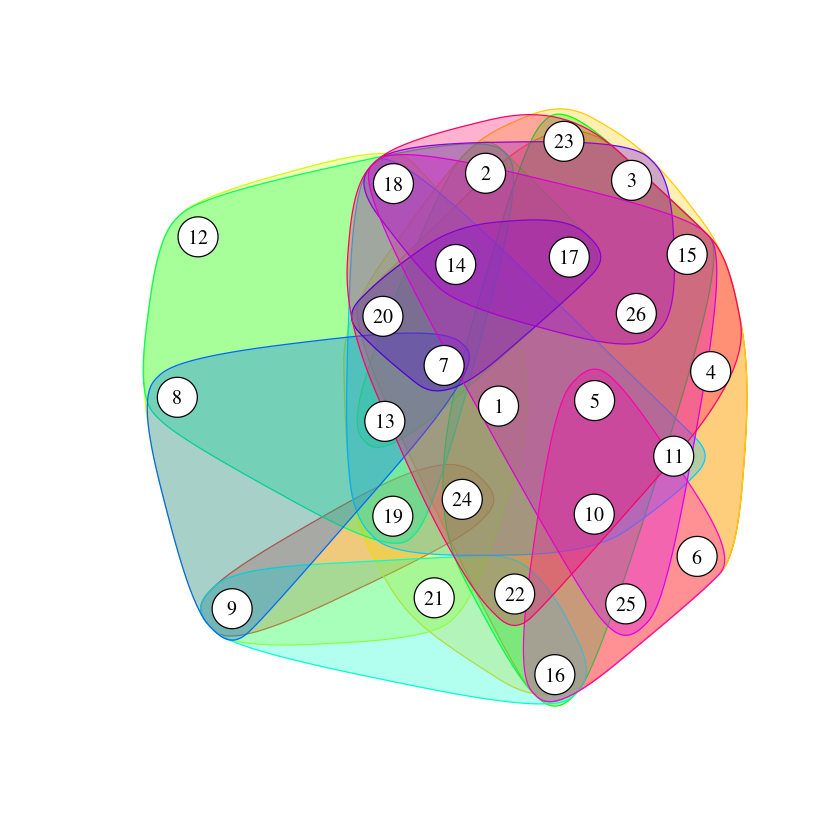

In [23]:
h1 <- hypergraph_from_incidence_matrix(t(inc_matrix))
plot(h1,
     vertex.color = "white",
     vertex.label.color = "black")

## 7) Две одномодальные сети
---
Представить сеть аффилированности в виде двух одномодальных сетей: сеть соучастия и сеть перекрытия событий. Представить полученные сети в виде ценностных матриц и взвешенных графов.
Сделать выводы.

[1] "Матрица соучастия акторов:"


3,1,1,1,1,1,2,1,1,2,⋯,1,2,3,2,2,1,1,2,1,1
1,3,1,1,1,1,1,1,0,1,⋯,2,0,2,1,1,1,1,1,1,1
1,1,2,1,1,1,1,0,0,1,⋯,2,1,1,1,1,1,1,1,1,2
1,1,1,3,1,2,1,0,0,1,⋯,3,1,1,3,1,2,3,2,2,2
1,1,1,1,3,2,1,0,0,1,⋯,1,1,1,1,1,1,1,1,2,1
1,1,1,2,2,3,1,0,0,1,⋯,2,0,1,2,1,1,2,1,2,2
2,1,1,1,1,1,4,2,2,1,⋯,2,1,2,3,2,1,1,2,1,1
1,1,0,0,0,0,2,3,2,0,⋯,0,1,2,1,1,0,0,1,0,0
1,0,0,0,0,0,2,2,4,0,⋯,0,1,2,1,2,1,0,2,0,0
2,1,1,1,1,1,1,0,0,2,⋯,1,1,2,1,1,1,1,1,1,1
2,1,1,2,1,2,1,0,0,2,⋯,2,1,2,2,1,1,2,1,2,2


[1] "Матрица перекрытия событий:"


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
a,3,0,2,3,0,1,1,1,1,1,0,0,0,0,1
b,0,11,11,2,1,3,0,1,1,0,3,3,3,2,6
c,2,11,22,8,3,4,2,3,5,1,4,4,4,3,8
d,3,2,8,12,1,1,3,2,4,3,3,2,2,0,4
e,0,1,3,1,3,0,1,0,1,0,1,1,0,0,1
f,1,3,4,1,0,4,0,1,0,0,0,0,1,1,3
g,1,0,2,3,1,0,4,0,1,1,0,0,0,0,0
h,1,1,3,2,0,1,0,4,0,1,0,0,0,1,1
i,1,1,5,4,1,0,1,0,6,0,0,1,1,0,1
j,1,0,1,3,0,0,1,1,0,3,1,0,0,0,0


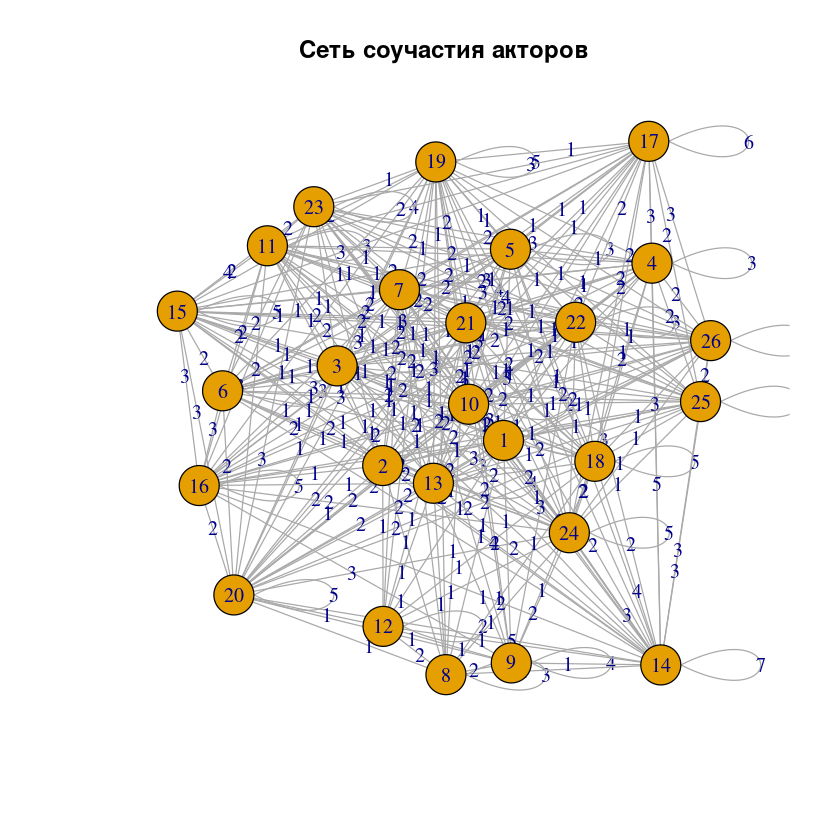

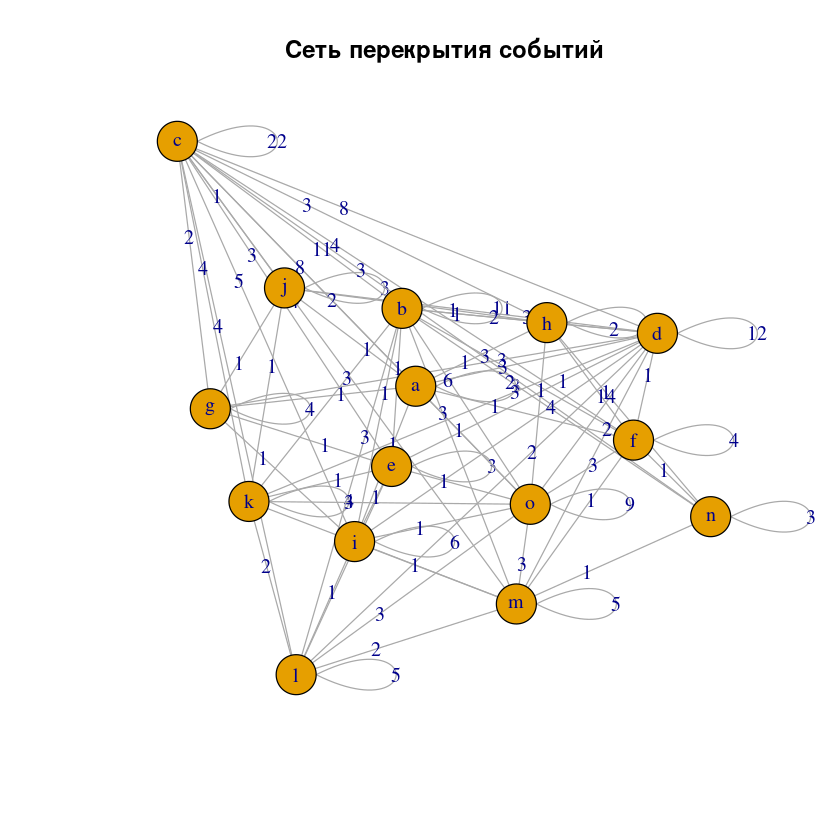

In [24]:
X <- inc_matrix
X_N <- X %*% t(X)
print("Матрица соучастия акторов:")
X_N
graph <- graph_from_adjacency_matrix(X_N, mode = "undirected", weighted = TRUE)
plot(graph, edge.label=E(graph)$weight, layout=layout_with_kk(graph), main='Сеть соучастия акторов')

X_M <- t(X) %*% X
print("Матрица перекрытия событий:")
X_M
graph <- graph_from_adjacency_matrix(X_M, mode="undirected", weighted=TRUE)
plot(graph, edge.label=E(graph)$weight, layout=layout_with_kk(graph), main='Сеть перекрытия событий')

Вывод: были построены сети соучастия акторов и перекрытия событий. У каждой вершины есть петля - её вес отражает количество акторов, аффилированных с данным событием. В сети перекрытия событий значения разнообразные - встречаются как небольшие, напрример 1, 2, 3, так и достаточно немалые - 11, 14. Таким образом, в сети есть как сильно связанные друг с другом события, так и слабо связанные.

## 8) Степень участия каждого актора 
Вычислить степень участия для каждого актора, а также среднее количество событий, с которыми актор аффилирован. Сделать выводы.

In [25]:
h <- ncol(inc_matrix)
g <- nrow(inc_matrix)
part_degree <- rowSums(inc_matrix)
avg_part_degree <- sum(part_degree)/g
part_df <- data.frame(part_degree)
part_df
avg_part_degree

part_degree
<dbl>
3
3
2
3
3
3
4
3
4


[1] 3.769231

Каждый актор в среднем связан с 3.76 событиями, что сравнительно немного, так как всего событий в сети 15. При этом разброс от этого среднегго достаточно большой - есть значение 2 и 7.

## 9) Вычислить размер и средний размер для каждого события. Сделать выводы.

In [26]:
event_degree <- colSums(inc_matrix)
avg_event_degree <- sum(event_degree)/h
event_df <- data.frame(event_degree)
event_df
avg_event_degree
     

,event_degree
,<dbl>
a,3
b,11
c,22
d,12
e,3
f,4
g,4
h,4
i,6


[1] 6.533333

Событие в среднем содержит в себе 6.5 акторов, что сравнительно немного, так как всего акторов - 26.  При этом разброс еще больше - есть значения 3 и 22.

## 10) Плотность для соучастия и перекрытия
---
Вычислить плотность для соотношения соучастия и отношения перекрытия. Проинтерпретируйте полученные значения

In [27]:
D_N<-(1/(g*(g-1))*(sum(X_N)-sum(diag(X_N))))
D_N
D_M<-(1/(h*(h-1))*(sum(X_M)-sum(diag(X_M))))
D_M    

[1] 1.412308

[1] 1.485714

Плотность отношения соучастия составила 1.41. Данное значение достаточно низкое, учитывая, что плотность отношения соучастия лежит в диапазоне $[0, 15]$.  
Плотность отношения перекрытия равна 1.48. Данное значение является низким, так как плотность отношения перекрытия лежит в диапазоне $[0, 26]$. 

## 11) Определить диаметр сети аффилированности.


In [28]:

graph1<-graph_from_adjacency_matrix(X_N, mode = "undirected")
graph2<-graph_from_adjacency_matrix(X_M, mode = "undirected")
max(diameter(graph1), diameter(graph2))


[1] 2

Диаметр сети аффилированности получился равным 2

## 12) Клики для соучастия и перекрытия
---
Определить клики уровня 𝑐 = {4, 3} для отношения соучастия и клики уровня 𝑐 = {6, 5, 4, 3, 2} для отношения перекрытия событий. Сделать выводы.

Перечислим клики уровней 3 и 4 для отношения соучастия.

In [29]:
comembership_m <- tcrossprod(inc_matrix)
comembership_g <- graph.adjacency(comembership_m, mode = 'undirected', weighted = T)

overlap_m <- t(inc_matrix) %*% inc_matrix
overlap_g <- graph.adjacency(overlap_m, mode = 'undirected', weighted = T)

cat("уровень 3\n")
temp <- delete_edges(comembership_g,  E(comembership_g)[E(comembership_g)$weight < 3])
max_cliques(temp, min = 3)
cat("уровень 4\n")
temp <- delete_edges(comembership_g,  E(comembership_g)[E(comembership_g)$weight < 4])
max_cliques(temp, min = 3)

уровень 3


[[1]]
+ 3/26 vertices, from ad68660:
[1]  1 13 19

[[2]]
+ 3/26 vertices, from ad68660:
[1]  7 14 20

[[3]]
+ 3/26 vertices, from ad68660:
[1] 16 15 23

[[4]]
+ 3/26 vertices, from ad68660:
[1] 25 14 15

[[5]]
+ 3/26 vertices, from ad68660:
[1] 26 14 17

[[6]]
+ 5/26 vertices, from ad68660:
[1] 24 14 23 20 15

[[7]]
+ 6/26 vertices, from ad68660:
[1] 14  4 23 20 17 15


уровень 4


[[1]]
+ 3/26 vertices, from e3c2668:
[1] 20 14 17


Перечислим клики уровней 3, 4, 5 и 6 для отношения перекрытия.

In [30]:
cat("уровень 3\n")
temp <- delete_edges(overlap_g,  E(overlap_g)[E(overlap_g)$weight < 3])
max_cliques(temp, min = 3)
cat("уровень 4\n")
temp <- delete_edges(overlap_g,  E(overlap_g)[E(overlap_g)$weight < 4])
max_cliques(temp, min = 3)
cat("уровень 5\n")
temp <- delete_edges(overlap_g,  E(overlap_g)[E(overlap_g)$weight < 5])
max_cliques(temp, min = 3)
cat("уровень 6\n")
temp <- delete_edges(overlap_g,  E(overlap_g)[E(overlap_g)$weight < 6])
max_cliques(temp, min = 3)

уровень 3


[[1]]
+ 3/15 vertices, named, from 5223306:
[1] i c d

[[2]]
+ 4/15 vertices, named, from 5223306:
[1] m b o c

[[3]]
+ 4/15 vertices, named, from 5223306:
[1] o c b f

[[4]]
+ 4/15 vertices, named, from 5223306:
[1] o c b k

[[5]]
+ 4/15 vertices, named, from 5223306:
[1] o c b l

[[6]]
+ 4/15 vertices, named, from 5223306:
[1] o c d k


уровень 4


[[1]]
+ 3/15 vertices, named, from e7a10cf:
[1] o c b

[[2]]
+ 3/15 vertices, named, from e7a10cf:
[1] o c d

[[3]]
+ 3/15 vertices, named, from e7a10cf:
[1] d c i


уровень 5


[[1]]
+ 3/15 vertices, named, from 6b98de2:
[1] b c o


уровень 6


[[1]]
+ 3/15 vertices, named, from c0c1ded:
[1] b c o


## 13) Для каждых пар событий определить отношение шансов. Сделать выводы.

In [31]:
for (k in 1:(h-1)){
    for(l in (k+1):h){
        tmp <- inc_matrix[, c(k, l)]
        res <- sum(colSums(t(tmp) == c(1, 1)) == ncol(tmp))*
        sum(colSums(t(tmp) == c(0, 0)) == ncol(tmp))/
        sum(colSums(t(tmp) == c(0, 1)) == ncol(tmp))/
        sum(colSums(t(tmp) == c(1, 0)) == ncol(tmp))
        cat('(', k, ', ', l, ') = ', res, '\n', sep="")
    }
}
    

(1, 2) = 0
(1, 3) = 0.3
(1, 4) = Inf
(1, 5) = 0
(1, 6) = 3.333333
(1, 7) = 3.333333
(1, 8) = 3.333333
(1, 9) = 1.8
(1, 10) = 5.25
(1, 11) = 0
(1, 12) = 0
(1, 13) = 0
(1, 14) = 0
(1, 15) = 0.9375
(2, 3) = Inf
(2, 4) = 0.1111111
(2, 5) = 0.65
(2, 6) = 5.25
(2, 7) = 0
(2, 8) = 0.4
(2, 9) = 0.2
(2, 10) = 0
(2, 11) = 5.25
(2, 12) = 2.4375
(2, 13) = 2.4375
(2, 14) = 3.111111
(2, 15) = 4.8
(3, 4) = 0
(3, 5) = Inf
(3, 6) = Inf
(3, 7) = 0.1
(3, 8) = 0.4736842
(3, 9) = 0.8823529
(3, 10) = 0.04761905
(3, 11) = Inf
(3, 12) = 0.6666667
(3, 13) = 0.6666667
(3, 14) = Inf
(3, 15) = 1.714286
(4, 5) = 0.5454545
(4, 6) = 0.3333333
(4, 7) = 4.333333
(4, 8) = 1.2
(4, 9) = 3
(4, 10) = Inf
(4, 11) = 4.333333
(4, 12) = 0.7333333
(4, 13) = 0.7333333
(4, 14) = 0
(4, 15) = 0.9
(5, 6) = 0
(5, 7) = 3.333333
(5, 8) = 0
(5, 9) = 1.8
(5, 10) = 0
(5, 11) = 3.333333
(5, 12) = 2.375
(5, 13) = 0
(5, 14) = 0
(5, 15) = 0.9375
(6, 7) = 0
(6, 8) = 2.111111
(6, 9) = 0
(6, 10) = 0
(6, 11) = 0
(6, 12) = 0
(6, 13) = 1.5
(6, 14) 

Среди данных значений есть много Inf и 0. Значение 0 означает, что у данных событий нет общих акторов, а значение inf - что для каждый актор в событии 1 обязательно аффилирован с событием 2.

## Выводы


В ходе выполнения практической работы были изучены подгруппы в социальной сети, отображения сети аффилированности в две одномодальные сети, проанализированы соотношения шансов для каждой пары событий.